In [109]:
#EXPERIMENTO ONE-BACK REPETTION (Réplica Maurer 2015)


from __future__  import division

import numpy as ny
import os, random
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:

a=[tuple(range(i*10,i*10+6)) for i in range(40)]


In [26]:
type(b[0])

list

In [142]:
# mirar las posiciones de los repetidos
# mirar la id de los repetidos
reps=4
nVueltas=10000
seRepiten=[]
posRepiten=[]
blockLength=20
for i in range(nVueltas):
    b=getTrialList(a,reps)
    rep=[]
    posRep=[]
    for nBlock,block in enumerate(b):
        for pos,value in enumerate(block):
            if value[3]==1:
                rep.append(value[0]/10)
                posRep.append(pos+blockLength*nBlock) # sigo con el indicador de posición del bloque anterior
    seRepiten.append(rep)
    posRepiten.append(posRep)
            

In [143]:
todosReps = [num for sublist in seRepiten for num in sublist]
todosPos = [num for sublist in posRepiten for num in sublist]

(array([  991.,   987.,   976.,   962.,  1016.,  1022.,  1050.,  1012.,
          981.,   966.,  1006.,   998.,   964.,  1017.,   968.,  1053.,
          947.,   998.,   946.,   994.,   997.,  1039.,  1005.,   988.,
         1022.,  1026.,  1019.,   980.,  1001.,  1021.,  1040.,   993.,
          986.,  1024.,  1012.,   990.,  1040.,   988.,  1007.,   968.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 40 Patch objects>)

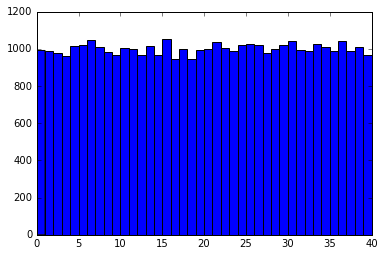

In [144]:
plt.hist(todosReps,range(41))

(array([    0.,     0.,     0.,     0.,  1452.,  1291.,  1307.,  1353.,
         1336.,  1298.,  1350.,  1299.,  1349.,  1319.,  1342.,  1272.,
         1288.,  1322.,  1422.,     0.,     0.,     0.,     0.,     0.,
         1459.,  1360.,  1296.,  1274.,  1298.,  1320.,  1309.,  1319.,
         1323.,  1303.,  1345.,  1338.,  1294.,  1334.,  1428.,     0.,
            0.,     0.,     0.,     0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 44 Patch objects>)

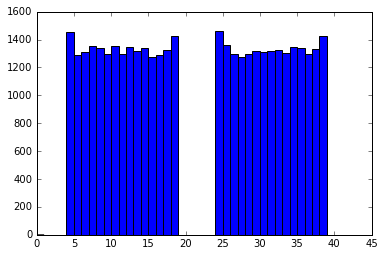

In [145]:
plt.hist(todosPos,range(45))

In [54]:
trialList[0]

array([310, 311, 312, 313, 314, 315])

In [141]:

#            FUNCIÓN PARA CREAR LISTAS CON REPETICIONES ALEATORIAS         


# esta función toma de entrada una lista de items (como en "palabras_provisorio.csv")  y crea:
# A- 1 trial por item
# B_ nReps trials extra, repitiendo los items
# C_ randomiza orden, dejando margen al principio y al final sin repetidos
# D_ los repetidos van juntos :) (ej: cara cara nariz payaso boca mia mia)
# E_ Dos bloques 

def getTrialList(itemList,nReps):
    #flankers al principio y al final, que no se van a repetir
    flankers=3
    # condicion de stop
    if nReps+4*flankers+2>len(itemList):
        return(None)
    #for nItem,item,cond_target,bloque,e,f,g,h,i,j in itemList:
    #creo lista permutada
    #trialList=list(  ny.random.permutation(itemList)   )
    random.shuffle(trialList)
    # partir a la mitad itemList
    #cuanto es la mitad?
    mitaditemList=int(round(len(itemList)/2.0)) #la mitad    
   
    # partir a la mitad nReps
    #cuanto es la mitad?
    mitad1nReps=int(round(nReps/2.0)) #la mitad
    mitad2nReps=nReps-mitad1nReps # la otra mitad


    #vamos a generar dos bloques
    block1 = trialList[:mitaditemList]
    block2 = trialList[mitaditemList:]
           
    #vamos a elegir los indices de los repetidos, dejando flankers
    permItemList1=ny.random.permutation(range(flankers,len(block1)-flankers))
    permItemList2=ny.random.permutation(range(flankers,len(block2)-flankers))
    # son los primeros "12" de la permutaciòn, en orden de menor amayor
    itemsARepetir1=ny.array(sorted(permItemList1[range(mitad1nReps)]))
    itemsARepetir2=ny.array(sorted(permItemList2[range(mitad2nReps)]))
    #donde van a ir al final, antes de aleatorizar
    itemsARepetir1a=itemsARepetir1 +  ny.arange(len(itemsARepetir1))
    itemsARepetir2a=itemsARepetir2 +  ny.arange(len(itemsARepetir2))
    posAInsertar1=itemsARepetir1a + 1
    posAInsertar2=itemsARepetir2a + 1
    
    
    for indice,posicion in enumerate(posAInsertar1):
        nuevoTrial = ny.array(block1[itemsARepetir1a[indice]])
        nuevoTrial[3] = '1'
        # en la posicion posAInsertar, inserto el item numero itemsARepetir[indice] de la lista
        block1.insert(posicion,nuevoTrial)
    for indice,posicion in enumerate(posAInsertar2):
    # en la posicion posAInsertar, inserto el item numero itemsARepetir[indice] de la lista
        nuevoTrial = ny.array(block2[itemsARepetir2a[indice]])
        nuevoTrial[3] = '1'
        block2.insert(posicion,nuevoTrial)
    return([block1,block2])
